# Hypothesis 3 - Light injuries

## Data loading, cleaning, EDA

Load packages

In [51]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import data_loader as dl

Load data

In [52]:
df = dl.load_data(2021, 2021)
df = df[df['reg'] == 'JHM']

df_new = df[
    ['usmrceno', 'tezce zraneno', 'lehce zraneno', 'smyk', 'rok vyroby vozidla', 'skoda na vozidle', 'den v tydnu',
    'druh povrchu']].copy(
    deep=True)
df_new['alkohol'] = df['alkohol vinika'].replace({2: 0, 1: 1, 3: 2, 6: 3, 7: 4, 8: 5, 9: 6, 4: np.NAN, 5: np.NAN})
df_new['drogy'] = df['alkohol vinika'] == 4

alkohol_non_valid = df['alkohol vinika'] == 5
df_new = df_new.loc[~alkohol_non_valid]

df_new['stav povrchu ok'] = df['stav povrchu'] == 1
df_new['povetrnostni podminky ok'] = df['povetrnostni podminky'] == 1
df_new['mlha'] = df['povetrnostni podminky'] == 2
df_new['dest'] = (df['povetrnostni podminky'] == 3 ) | (df['povetrnostni podminky'] == 4 )
df_new['snih'] = (df['povetrnostni podminky'] == 5 )
df_new['naledi'] = (df['povetrnostni podminky'] == 6 )
df_new['vitr'] = (df['povetrnostni podminky'] == 7 )

df_new['stav komunikace ok'] = df['stav komunikace'] == 1
df_new['viditelnost ok'] = df['viditelnost'] == 1
df_new['rozhledove ok'] = df['rozhledove podminky'] == 1

df_new['prechod'] = (df['spec mista a objekty'] == 1) | (df['spec mista a objekty'] == 2)
df_new['zeleznice'] = (df['spec mista a objekty'] == 4) | (df['spec mista a objekty'] == 3)
df_new['parkoviste'] = (df['spec mista a objekty'] == 10)
df_new['parkoviste'] = (df['spec mista a objekty'] == 10)

df_new['dalnice'] = df['druh pozemni komunikace'] == 0
df_new['silnice'] = (df['druh pozemni komunikace'] == 1) | (df['druh pozemni komunikace'] == 2) | (
        df['druh pozemni komunikace'] == 3)
df_new['mistni'] = df['druh pozemni komunikace'] == 6
df_new['polni'] = df['druh pozemni komunikace'] == 7

komunikace_non_valid = df['druh pozemni komunikace'] == 5
df_new = df_new.loc[~komunikace_non_valid]

df_new['soukrome'] = (df['charakter vozidla'] == 1) | (df['charakter vozidla'] == 2)
df_new['hromadna_doprava'] = (df['charakter vozidla'] == 4) | (df['charakter vozidla'] == 5)
df_new['taxi'] = df['charakter vozidla'] == 7

# kategorie_ridice_non_valid = ~(df['kat ridice'].isin([1, 2, 3, 4, 5, 6, 7]))
# df_new = df_new.loc[~kategorie_ridice_non_valid]

df_new['kat_A'] = df['kat ridice'] == 1
df_new['kat_B'] = df['kat ridice'] == 2
df_new['kat_C'] = df['kat ridice'] == 3
df_new['kat_D'] = df['kat ridice'] == 4
df_new['kat_T'] = df['kat ridice'] == 5
df_new['kat_A'] = df['kat ridice'] == 6

hlavni_pricina = df['hlavni pricina'].astype('Int64')
df_new['neprimerena_rychlost'] = (hlavni_pricina >= 201) & (hlavni_pricina <= 209)
df_new['nespravne_predjizdeni'] = (hlavni_pricina >= 301) & (hlavni_pricina <= 311)
df_new['nespravny_zpusob_jizdy'] = (hlavni_pricina >= 501) & (hlavni_pricina <= 516)
df_new['technicka_zavada'] = (hlavni_pricina >= 601) & (hlavni_pricina <= 615)

df_new['stav_ridice_ok'] = df['stav ridice'] == 1

df_new['neovlivnen'] = df['vnejso ovlivneni'] == 1
df_new['oslnen'] = df['vnejso ovlivneni'] == 2
df_new['zvire'] = df['vnejso ovlivneni'] == 5

df_new['zpusob vyprosteni'] = df['zpusob vyprosteni']

df_new['obec'] = df['lokalita nehody'] == 1

df_new = df_new.replace({True: 1, False: 0})
df_new.dropna(inplace=True, axis=1)

df = df_new

print(len(df.columns))
df.head()


41


usmrceno  tezce zraneno  lehce zraneno  skoda na vozidle  den v tydnu  \
3          0              0              2               450            5   
4          0              0              0               100            5   
5          0              0              0               500            5   
60         0              0              0                 0            5   
69         0              0              0                 0            5   

    druh povrchu  drogy  stav povrchu ok  povetrnostni podminky ok  mlha  ...  \
3              2      0                1                         1     0  ...   
4              2      0                0                         0     0  ...   
5              2      0                0                         0     1  ...   
60             2      0                1                         1     0  ...   
69             2      0                1                         1     0  ...   

    kat_T  neprimerena_rychlost  nespravne_predjizdeni  \
3       0                 False                  False   
4       0                  True                  False   
5       0                  True                  False   
60      0                 False                  False   
69      0                 False                  False   

    nespravny_zpusob_jizdy  technicka_zavada  stav_ridice_ok  neovlivnen  \
3                     True             False               0           1   
4                    False             False               0           1   
5                    False             False               1           1   
60                    True             False               0           0   
69                    True             False               0           0   

    oslnen  zvire  obec  
3        0      0     0  
4        0      0     0  
5        0      0     0  
60       0      0     1  
69       0      0     1  

[5 rows x 41 columns]

### Relationships in dataset.
Show correlations. There are not any usefull correlations. Two biggest correlation are between "stav_ridice_ok" vs "neovlivnen",
which is basically the same and "mistni" vs "silnice" which describes almost the same kind of road. Therefore one
from each pair will be removed.

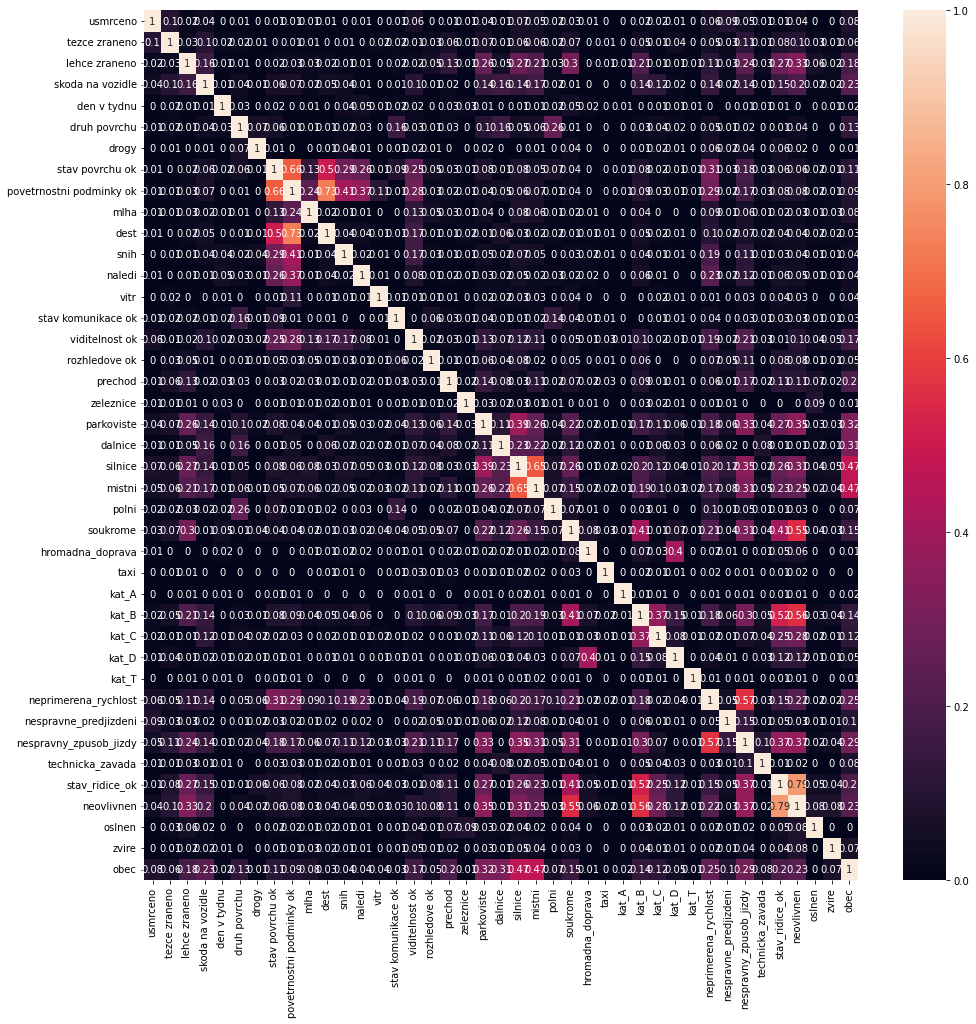

In [53]:
fig, axes = plt.subplots(1, 1, figsize=(16, 16))
df_c = df.corr().abs().round(decimals=2)
# df_c = df.corr().round(decimals=2)
sns.heatmap(df_c, annot=True, ax=axes)
fig.savefig('./img/zraneni_corr.png', dpi=600)

In [54]:
df = df.drop(columns=['mistni', 'stav_ridice_ok'])

### Light injury
We want to predict number of light injuries (LI). Most of accidents have zero or one LI. Other options are very rare.

/home/awesome/anaconda3/envs/oznal_conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


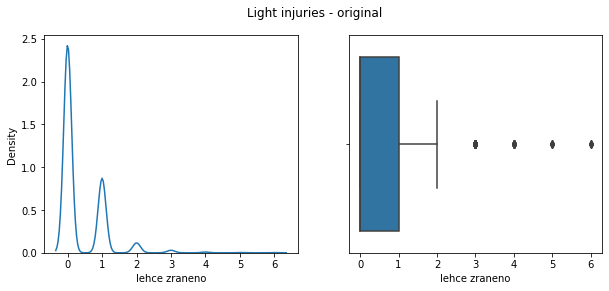

In [55]:
pred_column = 'lehce zraneno'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(df[pred_column], ax=ax1)
sns.boxplot(df[pred_column], ax=ax2)

fig.suptitle("Light injuries - original")
fig.savefig('./img/li_o.png')

In [56]:
df[pred_column].describe()


count    5547.000000
mean        0.362899
std         0.647122
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: lehce zraneno, dtype: float64

We can focuse at majority numbers only and we remove the outliers.

In [57]:
le_4_cnt = (df[pred_column] >= 4).sum()
total = len(df)

print(f"Percent of 4 and more injuries: {100 * le_4_cnt / total}%")
print(f"Total of 4 and more injuries: {le_4_cnt}")


df = df[df[pred_column] <= 3]


Percent of 4 and more injuries: 0.4146385433567694%
Total of 4 and more injuries: 23


/home/awesome/anaconda3/envs/oznal_conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


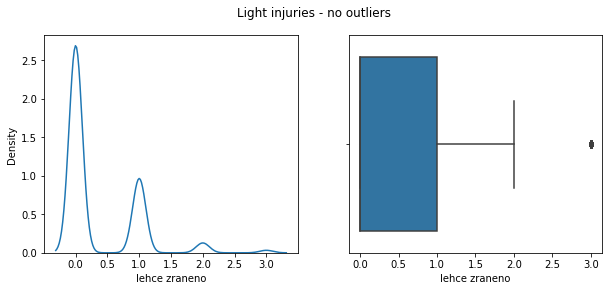

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(df[pred_column], ax=ax1)
sns.boxplot(df[pred_column], ax=ax2)

fig.suptitle("Light injuries - no outliers")
fig.savefig('./img/li_no.png')

As we want to predcit one kind of physical injury it should not be based on other kind of injuries or number of deaths.

In [59]:
df.drop(columns=['usmrceno', 'tezce zraneno', 'skoda na vozidle'], inplace=True)
df.columns

Index(['lehce zraneno', 'den v tydnu', 'druh povrchu', 'drogy',
       'stav povrchu ok', 'povetrnostni podminky ok', 'mlha', 'dest', 'snih',
       'naledi', 'vitr', 'stav komunikace ok', 'viditelnost ok',
       'rozhledove ok', 'prechod', 'zeleznice', 'parkoviste', 'dalnice',
       'silnice', 'polni', 'soukrome', 'hromadna_doprava', 'taxi', 'kat_A',
       'kat_B', 'kat_C', 'kat_D', 'kat_T', 'neprimerena_rychlost',
       'nespravne_predjizdeni', 'nespravny_zpusob_jizdy', 'technicka_zavada',
       'neovlivnen', 'oslnen', 'zvire', 'obec'],
      dtype='object')

## Modelling

The results, we want to predict, are integers. Therefore, we can use both - regression or classification. We have more
than 3 input parameters without any strong correlations, the model we will use is RandomForrest.

Help functions

In [60]:
def split_input_target(df_i: pd.DataFrame):
    input_ = df_i.loc[:, df_i.columns != pred_column]
    target_ = df_i.loc[:, df_i.columns == pred_column]
    
    return input_, target_.values.reshape(-1)


def split_train_val(df_i: pd.DataFrame):
    df_i = df_i.sample(frac=1, random_state=42)

    total = len(df_i)
    trail_len = int(0.7 * total)
    train = df_i[:trail_len]
    val = df_i[trail_len:]

    return train, val

train, val = split_train_val(df)
input_t, target_t = split_input_target(train)
input_v, target_v = split_input_target(val)

### Models
Prepare models and evaluation function.

In [61]:
def evaluate_classification(prediction, expected, print_r=False):
    prediction = pd.Series(prediction)
    accuracy = accuracy_score(expected, prediction)

    if print_r:
        print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy * 100


def evaluate_regression(prediction, expected, print_r=False):
    th = 0.5
    errors = abs(prediction - expected)
    accuracy = np.sum(errors < th) / len(expected) * 100

    if print_r:
        print('Regression average Error: {:0.4f}.'.format(np.mean(errors)))
        print('Regression accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy


def random_forrest_cls(input_, target_, n_estimators=20, max_depth=10):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth).fit(input_, target_)
    return model


def random_forrest_reg(input_, target_, n_estimators=20, max_depth=10):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth).fit(input_, target_)
    return model

### Hyperparameter - tree cnt

In [62]:
def compare_tree_cnt(rf, evaluation, input_t, target_t, input_v, target_v):
    tree_cnt = []
    accuracy = []
    for i in range(1, 100, 1):
        m = rf(input_t, target_t, n_estimators=i)
        prediction = m.predict(input_v)
        acc = evaluation(prediction, target_v)
        accuracy.append(acc)
        tree_cnt.append(i)

    return tree_cnt, accuracy


In [63]:
tree_cnt, acc_cls = compare_tree_cnt(random_forrest_cls, evaluate_classification, input_t, target_t, input_v, target_v)
_, acc_reg = compare_tree_cnt(random_forrest_reg, evaluate_regression, input_t, target_t, input_v, target_v)

Plot models comparison with different depths.

Both models have very simmilar results. Number of created trees does not play an important role, small number of trees is sufficient. The accuracy is changing only slightly.

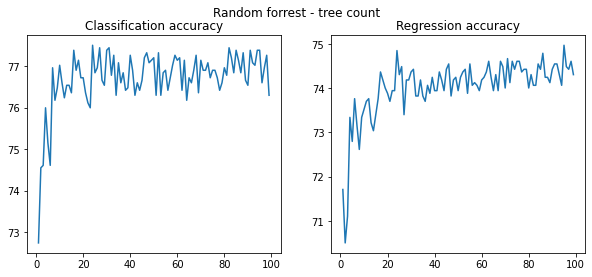

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.lineplot(x=tree_cnt, y=acc_cls, ax=ax1)
sns.lineplot(x=tree_cnt, y=acc_reg, ax=ax2)

ax1.set_title("Classification accuracy")
ax2.set_title("Regression accuracy")

fig.suptitle("Random forrest - tree count")
fig.savefig('./img/rf_tree_cnt.png')


### Hyperparameter - tree depth

In [65]:
def compare_depth(rf, evaluation, input_t, target_t, input_v, target_v):
    depths = []
    accuracy = []
    for i in range(5, 40, 1):
        m = rf(input_t, target_t, max_depth=i)
        prediction = m.predict(input_v)
        acc = evaluation(prediction, target_v)
        accuracy.append(acc)
        depths.append(i)

    return depths, accuracy


In [66]:
depth, acc_cls = compare_depth(random_forrest_cls, evaluate_classification, input_t, target_t, input_v, target_v)
_, acc_reg = compare_depth(random_forrest_reg, evaluate_regression, input_t, target_t, input_v, target_v)

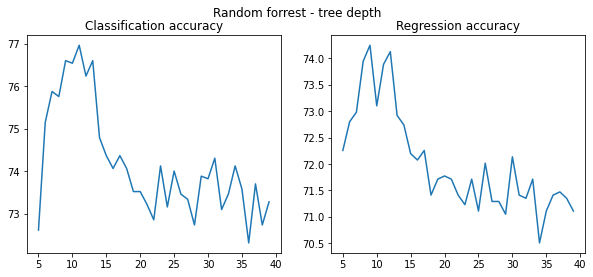

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.lineplot(x=depth, y=acc_cls, ax=ax1)
sns.lineplot(x=depth, y=acc_reg, ax=ax2)

ax1.set_title("Classification accuracy")
ax2.set_title("Regression accuracy")

fig.suptitle("Random forrest - tree depth")
fig.savefig('./img/rf_tree_depth.png')

The best results have both models with about tree depth 10. Classification model is slightly better.

### Results

The best model is classifier with tree depth 10 and number of threes 40. It has accuracy 76%.

In [68]:
m = random_forrest_cls(input_t, target_t, max_depth=10, n_estimators=40)
prediction = m.predict(input_v)
acc = evaluate_classification(prediction, target_v, print_r=True)

Accuracy = 0.76%.


### Interpretation

First tree

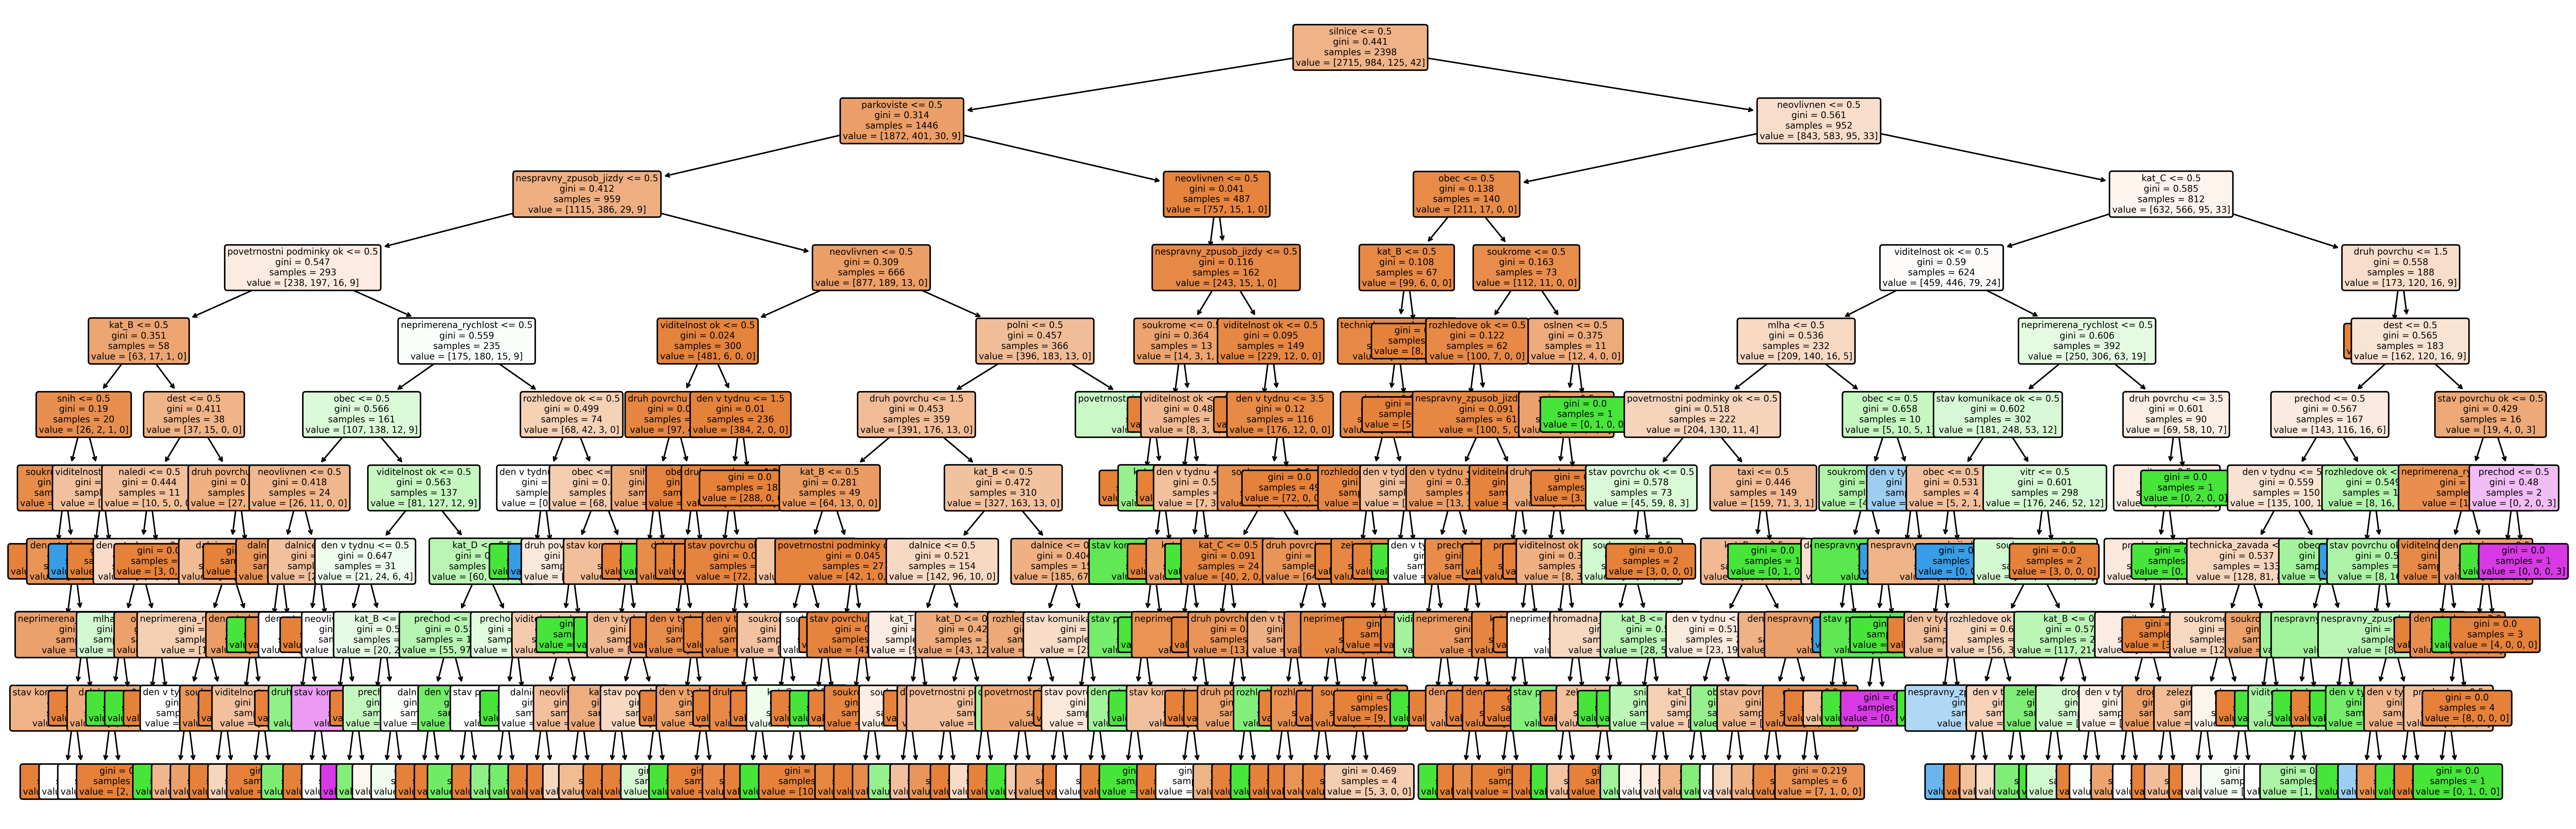

In [70]:
columns = input_t.columns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 10), dpi=500)
sklearn.tree.plot_tree(m.estimators_[0], fontsize=6, feature_names=np.array(columns),
               filled=True, impurity=True, rounded=True)

fig.savefig('./img/rf_individualtree.png')

The most important features.

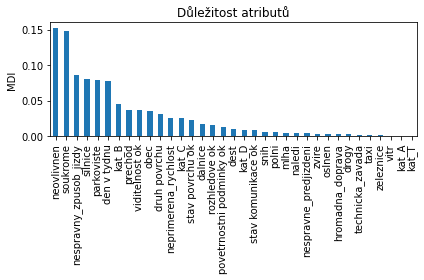

In [71]:
importances = m.feature_importances_

forest_importances = pd.Series(importances, index=columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Důležitost atributů")
ax.set_ylabel("MDI")
fig.tight_layout()
fig.savefig('./img/rf_importance.png')


In [72]:
print(sklearn.tree.export_text(m.estimators_[0], spacing=3, decimals=3,
                  feature_names=columns.to_list()))

|--- silnice <= 0.500
|   |--- parkoviste <= 0.500
|   |   |--- nespravny_zpusob_jizdy <= 0.500
|   |   |   |--- povetrnostni podminky ok <= 0.500
|   |   |   |   |--- kat_B <= 0.500
|   |   |   |   |   |--- snih <= 0.500
|   |   |   |   |   |   |--- soukrome <= 0.500
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- soukrome >  0.500
|   |   |   |   |   |   |   |--- den v tydnu <= 2.500
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- den v tydnu >  2.500
|   |   |   |   |   |   |   |   |--- neprimerena_rychlost <= 0.500
|   |   |   |   |   |   |   |   |   |--- stav komunikace ok <= 0.500
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- stav komunikace ok >  0.500
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- neprimerena_rychlost >  0.500
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- snih >  0.500
|   |   |

### CrossValidation

The cross validatin approves, the model has 0.76% accuracy.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

input_, target_ = split_input_target(df)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(m, input_, target_, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.758 (0.015)
